In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# task 1

df = pd.read_csv('DS2_C6_S3_CarSales_Data_Practice.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
df.shape

(157, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Manufacturer,117.0,12.743590,7.434952,0.000000,7.000000,12.000000,19.000000,25.000000
Model,117.0,57.683761,33.544014,0.000000,29.000000,58.000000,86.000000,115.000000
Sales_in_thousands,117.0,59.112316,75.058933,0.110000,16.767000,32.299000,76.029000,540.561000
__year_resale_value,117.0,18.031538,11.605632,5.160000,11.240000,14.010000,19.875000,67.550000
Vehicle_type,117.0,0.752137,0.433629,0.000000,1.000000,1.000000,1.000000,1.000000
Price_in_thousands,117.0,25.969487,14.149699,9.235000,16.980000,21.665000,29.465000,82.600000
Engine_size,117.0,3.048718,1.055169,1.000000,2.200000,3.000000,3.800000,8.000000
Horsepower,117.0,181.282051,58.591786,55.000000,140.000000,175.000000,210.000000,450.000000
Wheelbase,117.0,107.326496,8.050588,92.600000,102.400000,107.000000,111.600000,138.700000
Width,117.0,71.189744,3.530151,62.600000,68.500000,70.400000,73.600000,79.300000


In [9]:
df.corr()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Manufacturer,1.000000,0.014121,-0.108854,0.007008,-0.065339,-0.059690,-0.198276,-0.204274,-0.287358,-0.278857,-0.310028,-0.176264,-0.152296,0.110984,0.030083,-0.179019
Model,0.014121,1.000000,0.007472,-0.135488,-0.235982,-0.080587,0.104268,-0.034658,0.148159,0.131421,0.085267,0.095054,0.123186,-0.087907,-0.088333,-0.043825
Sales_in_thousands,-0.108854,0.007472,1.000000,-0.275426,-0.278774,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.008326,-0.175562
__year_resale_value,0.007008,-0.135488,-0.275426,1.000000,0.091679,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.110824,0.829511
Vehicle_type,-0.065339,-0.235982,-0.278774,0.091679,1.000000,0.076303,-0.182515,0.045867,-0.385062,-0.220744,-0.109779,-0.469247,-0.586927,0.539249,-0.000217,0.051096
Price_in_thousands,-0.059690,-0.080587,-0.251705,0.954757,0.076303,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.140502,0.905002
Engine_size,-0.198276,0.104268,0.038111,0.527187,-0.182515,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.197431,0.841005
Horsepower,-0.204274,-0.034658,-0.152538,0.773110,0.045867,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.173796,0.994071
Wheelbase,-0.287358,0.148159,0.406839,-0.053685,-0.385062,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.071171,0.200228
Width,-0.278857,0.131421,0.177802,0.178128,-0.220744,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.159345,0.478889


<AxesSubplot:>

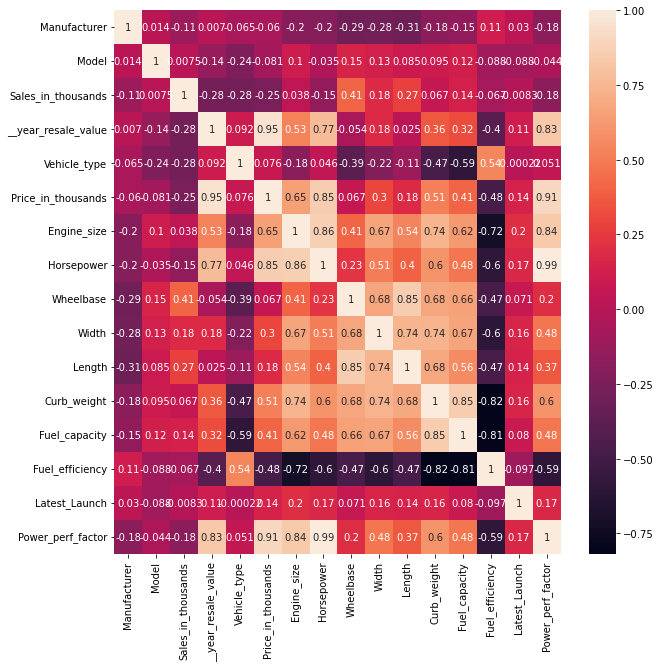

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)

In [11]:
df = df.drop(columns = ['__year_resale_value'])

In [12]:
df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,62,16.919,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,38,58.280150
1,0,107,39.384,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,77,91.370778
3,0,88,8.588,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,43,91.389779
4,1,4,20.397,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,17,62.777639
5,1,5,18.780,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,97,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,25,56,9.761,1,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,4,46.943877
146,25,63,83.721,1,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,92,47.638237
147,25,82,51.102,1,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,13,61.701381
148,25,19,9.569,1,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,69,48.907372


In [26]:
# task 2

In [40]:
x = df.iloc[:, [2, 4]].values

Text(0, 0.5, 'Euclidean Distance')

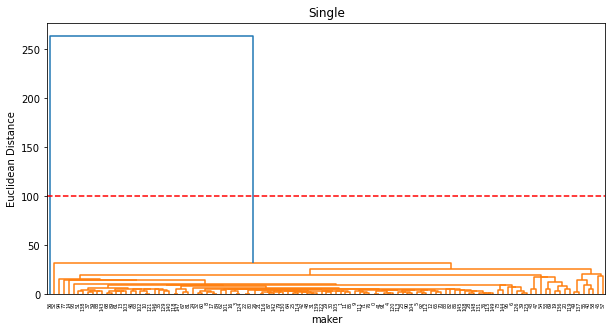

In [69]:
plt.figure(figsize = (10,5))
Den = sch.dendrogram(sch.linkage(x , method = 'single') , labels = df.index)
plt.axhline(y = 100 , color = 'r' , linestyle = '--')
plt.title('Single')
plt.xlabel('maker')
plt.ylabel('Euclidean Distance')

Text(0, 0.5, 'Euclidean distance')

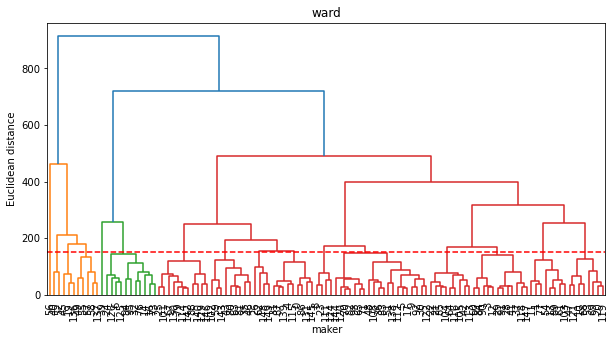

In [70]:
plt.figure(figsize=(10, 5))
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'),labels=df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('ward')
plt.xlabel('maker')
plt.ylabel('Euclidean distance')

Text(0.5, 1.0, 'Complete')

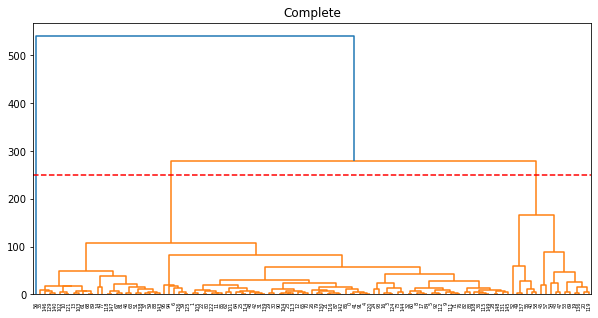

In [71]:
plt.figure(figsize=(10,5))
Den = sch.dendrogram(sch.linkage(x , method = 'complete') , labels = df.index)
plt.axhline(y = 250 , color = 'r' , linestyle = '--')
plt.title('Complete')

Text(0, 0.5, 'Euclidean distance')

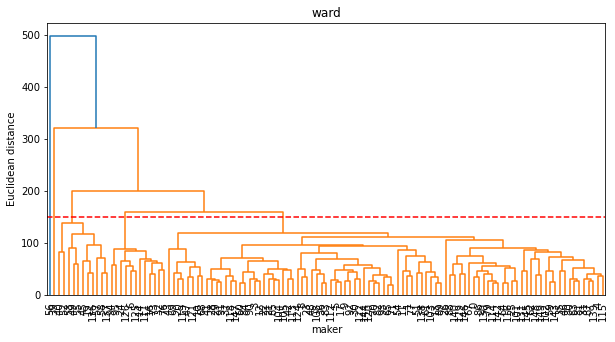

In [72]:
plt.figure(figsize=(10, 5))
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'average'),labels=df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('ward')
plt.xlabel('maker')
plt.ylabel('Euclidean distance')

In [82]:
# task 3 and 4

Text(0.5, 1.0, 'single for maker')

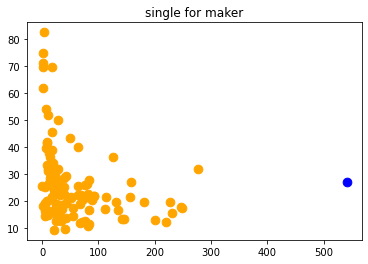

In [75]:
hc_1 = AgglomerativeClustering(n_clusters = 2 , affinity = 'euclidean', linkage = 'single')
y_hc_1 = hc_1.fit_predict(x) 
plt.scatter(x[y_hc_1 == 0 , 0], x[y_hc_1 == 0, 1] , s = 75 , c = 'orange')
plt.scatter(x[y_hc_1 == 1 , 0], x[y_hc_1 == 1, 1] , s = 75 , c = 'blue')
plt.title('single for maker')

Text(0.5, 1.0, 'Complete for maker')

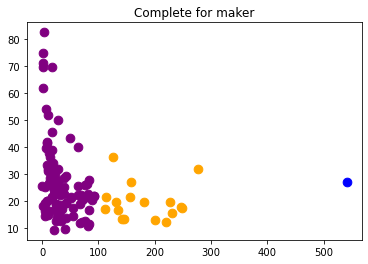

In [76]:
hc_2 = AgglomerativeClustering(n_clusters = 3 , affinity = 'euclidean' , linkage = 'complete')
y_hc_2 = hc_2.fit_predict(x) 
plt.scatter( x[y_hc_2 == 0 , 0] , x[y_hc_2 == 0 , 1] , s = 75 , c = 'orange')
plt.scatter( x[y_hc_2 == 1 , 0] , x[y_hc_2 == 1 , 1] , s = 75 , c = 'blue' )
plt.scatter( x[y_hc_2 == 2 , 0] , x[y_hc_2 == 2 , 1] , s = 75 , c = 'purple')
plt.title('Complete for maker')

Text(0.5, 1.0, 'maker for average')

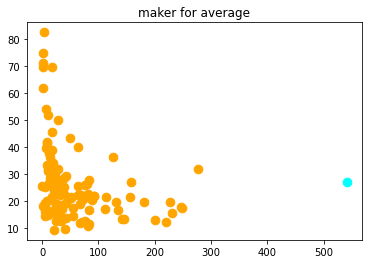

In [77]:
hc_3 = AgglomerativeClustering(n_clusters = 2 , affinity = 'euclidean', linkage = 'average')
y_hc_3 = hc_3.fit_predict(x) 
plt.scatter( x[y_hc_3 == 0 , 0] , x[y_hc_3 == 0 , 1] , s = 75 , c = 'orange')
plt.scatter( x[y_hc_3 == 1 , 0] , x[y_hc_3 == 1 , 1] , s = 75 , c = 'cyan')
plt.title('maker for average')

Text(0.5, 1.0, 'maker for ward')

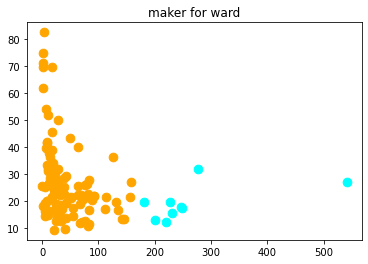

In [78]:
hc_4 = AgglomerativeClustering(n_clusters = 2 , affinity = 'euclidean' , linkage = 'ward')
y_hc_4 = hc_4.fit_predict(x) 
plt.scatter( x[y_hc_4 == 0 , 0] , x[y_hc_4 == 0 , 1] , s = 75 , c = 'orange')
plt.scatter( x[y_hc_4 == 1 , 0] , x[y_hc_4 == 1 , 1] , s = 75 , c = 'cyan')
plt.title('maker for ward')